In [ ]:
import os 
from six.moves import urllib 
import pandas as pd

In [ ]:
import pandas as pd 

def load_housing_data(housing_path=HOUSING_PATH): 
    return pd.read_csv('https://github.com/alexhegit/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true')


In [ ]:
housing = load_housing_data()
housing.head()  #showing the top five rows of dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()  #dataset description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()   

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


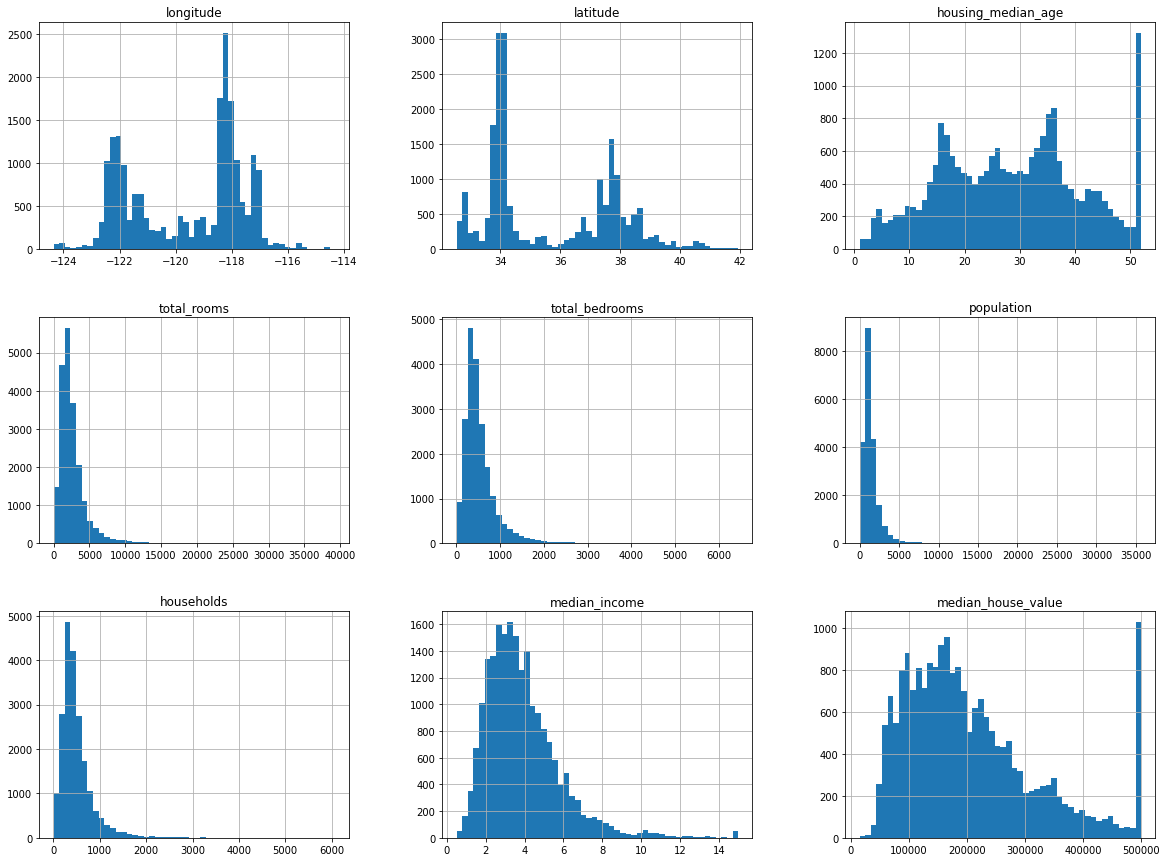

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
import numpy as np 
def split_train_test(data, test_ratio): 
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

"""
Syntax: pandas.DataFrame.iloc[]

Parameters:
Index Position: Index position of rows in integer or list of integer.

Return type: Data frame or Series depending on parameters"""

'\nSyntax: pandas.DataFrame.iloc[]\n\nParameters:\nIndex Position: Index position of rows in integer or list of integer.\n\nReturn type: Data frame or Series depending on parameters'

In [ ]:
train_set, test_set= split_train_test(housing,0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [ ]:
from sklearn.model_selection import train_test_split
train_setsk,test_setsk=train_test_split(housing,test_size=0.2,random_state=42)

In [ ]:
print(len(train_setsk))
print(len(test_setsk))

16512
4128


In [ ]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

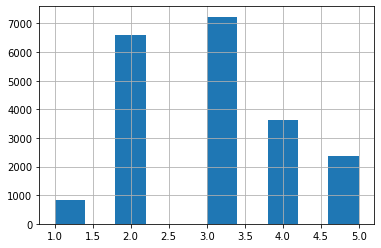

In [ ]:
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

#object initialized first.
#create an object with specified params
#then use it later as supposed to a function 
split_indices=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_indices.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
""""Series.loc
Access group of values using labels
For eg:-
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])
df
            max_speed  shield
cobra               1       2
viper               4       5
sidewinder          7       8"""


'"Series.loc\nAccess group of values using labels\nFor eg:-\ndf = pd.DataFrame([[1, 2], [4, 5], [7, 8]],\n     index=[\'cobra\', \'viper\', \'sidewinder\'],\n     columns=[\'max_speed\', \'shield\'])\ndf\n            max_speed  shield\ncobra               1       2\nviper               4       5\nsidewinder          7       8'

In [ ]:
print(len(strat_train_set))
print(len(strat_test_set))

16512
4128


In [ ]:
housing= strat_train_set.copy()

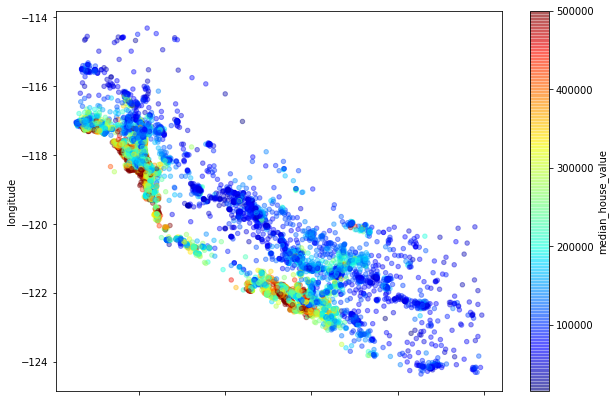

In [ ]:
#source: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-scatter
housing.plot(kind="scatter",x="latitude",y="longitude",alpha=0.4,figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80d623c898>,
      dtype=object)

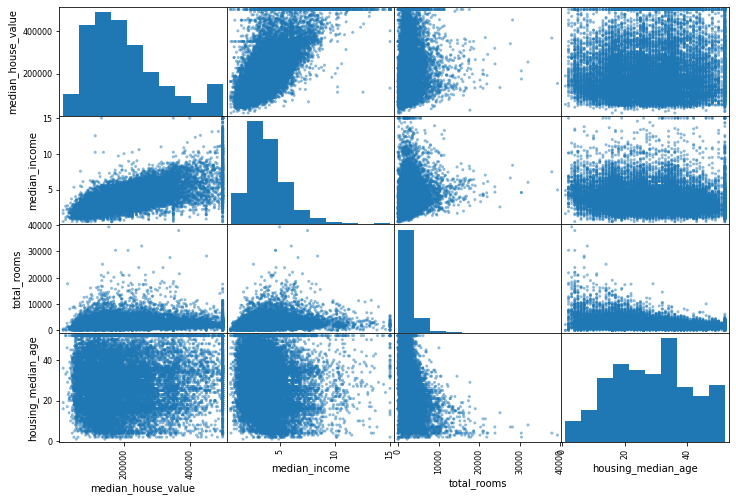

In [ ]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

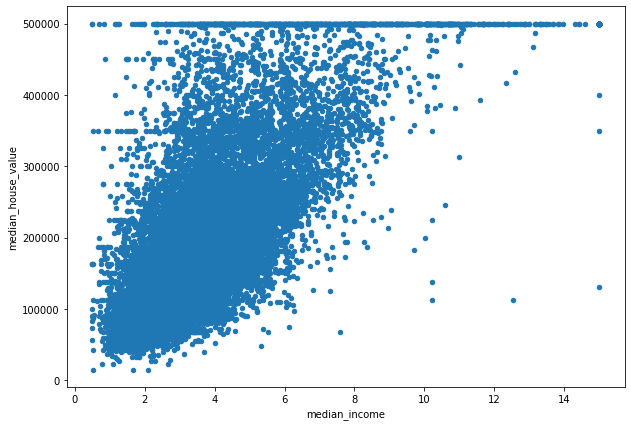

In [ ]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",figsize=(10,7))

In [ ]:
correlation=housing.corr()
correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [ ]:
housing["population_per_household"]=housing["population"]/housing["households"]
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]


In [ ]:
correlation=housing.corr()
correlation["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [ ]:
housing.drop("population_per_household",axis=1,inplace=True)

In [ ]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)    #A kind of initialization
X=imputer.transform(housing_num)
final=pd.DataFrame(X,columns=housing_num.columns)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoded=OrdinalEncoder()
housing_cat=housing[["ocean_proximity"]]
X=encoded.fit_transform(housing_cat)

In [ ]:
print(np.shape(housing_cat))
print(X[:10])

(16512, 1)
[[0.]
 [0.]
 [4.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder()
mask=one_hot_encoder.fit_transform(housing_cat)
print(mask[:10]) 
#Notice that the output is a SciPy sparse matrix,a sparse matrix only stores the location of the non‐zero elements.
mask_array=mask.toarray()
print(mask_array[:10])

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#converting the labels for various outputs into different classes using one hot encoding
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin 
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs 
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None): 
        return self # nothing else to do 
    def transform(self, X, y=None): 
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room: 
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] 
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room] 
        else: 
            return np.c_[X, rooms_per_household, population_per_household] 
        
        attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) 
        housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy="median")),
        ('attribs_adde', CombinedAttributesAdder()),
        ('std_scalar',StandardScaler()),
    ])                      

In [ ]:
#making a pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ('num',num_pipeline,num_attribs),
        ('cat',one_hot_encoder,cat_attribs),
    ])
housing_prepared=full_pipeline.fit_transform(housing)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]


In [ ]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68376.64295459937


In [ ]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
print(mean_absolute_percentage_error(housing_labels, housing_predictions),'%')

28.54784304730359 %


In [ ]:
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores:  [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Mean:  68828.99948449328
Standard deviation:  2662.7615706103393


In [ ]:
#using decision tree regressor for prediction
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)
print(mean_absolute_percentage_error(housing_labels, housing_predictions),'%')

0.0
0.0 %


In [ ]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores:  [68514.25521177 66510.21192626 71714.16393953 69097.8939499
 69888.55625221 75373.22693841 71144.45065013 70981.07017451
 76409.0601323  70358.54115392]
Mean:  70999.1430328956
Standard deviation:  2837.53767671377


In [ ]:
#using random forest regressor for prediction
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)
print(mean_absolute_percentage_error(housing_labels, housing_predictions),'%')

18614.730298574777
6.684427078721256 %


In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores= np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49457.14369999 47375.46925752 49413.97055593 52295.90442609
 49627.79941931 53251.64158344 48770.02563791 48102.72434874
 53036.58452008 50069.5486677 ]
Mean:  50140.081211672674
Standard deviation:  1940.3895335098498


<function matplotlib.pyplot.show>

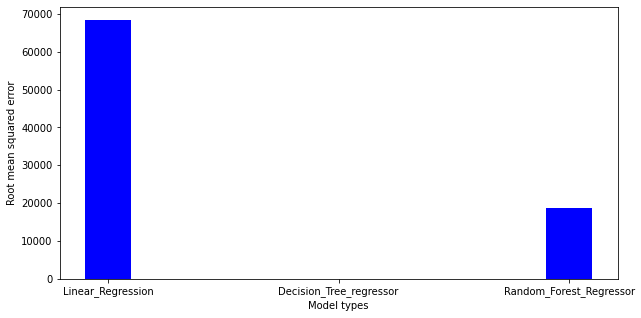

In [ ]:
#comparison of rms for different regression types
model_type = ('Linear_Regression','Decision_Tree_regressor','Random_Forest_Regressor')
values = (lin_rmse,tree_rmse,forest_rmse)

fig = plt.figure(figsize = (10, 5)) 
plt.bar(model_type, values, color = 'blue', width =0.2)
plt.xlabel("Model types")
plt.ylabel("Root mean squared error")
plt.show

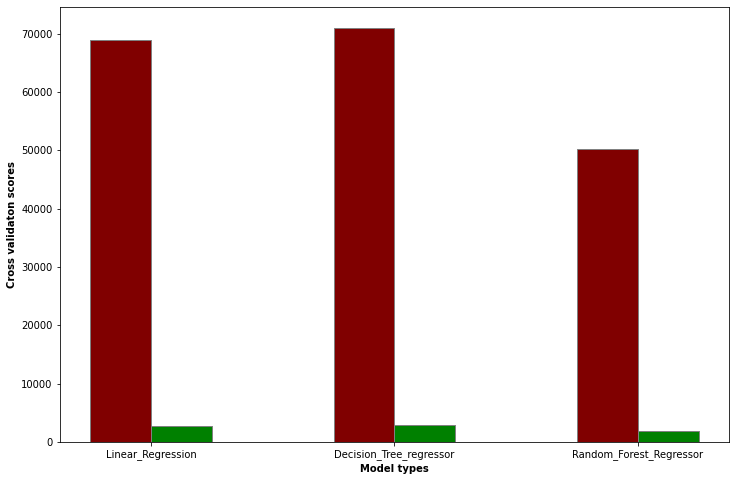

In [ ]:
#comparison of different regression types
barWidth=0.25
fig = plt.subplots(figsize = (12, 8)) 

# set height of bar 
mean_score = [lin_rmse_scores.mean(),tree_rmse_scores.mean(),forest_rmse_scores.mean()] 
stand_dev = [lin_rmse_scores.std(),tree_rmse_scores.std(),forest_rmse_scores.std()] 

br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, mean_score, color ='maroon', width = barWidth, edgecolor ='grey', label ='Mean_score') 
plt.bar(br2, stand_dev, color ='g', width = barWidth, edgecolor ='grey', label ='Standard_deviation')

plt.xlabel("Model types",fontweight ='bold')
plt.ylabel("Cross validaton scores",fontweight ='bold')
plt.xticks([r + barWidth/2 for r in range(len(mean_score))],model_type) 
plt.show()